<img src="https://i.ibb.co/DWSqtc1/Encabezado.png" alt="descargar" border="0" width=900px>

# **ifood marketing data segmentation**
 
<div style="text-align:center">
<img src="https://raw.githubusercontent.com/MayumyCH/datasciencefem-datachallenge-monthly/main/6.%20ifood-marketing-data-segmentacion/resources/criterios_segmentacion.jpg" alt="descargar" border="0" height=200px>
</div>

_En este proyecto se propone el análisis de la [data]() registrada en kaggle; buscamos **promover las ventas de un determinado producto** teniendo los siguientes datos: total de ventas de ese producto y gastos realizados en publicidad en los tres siguientes medios: TV, radio y periódico._

## IMPORTACIÓN DE LIBRERIAS

In [ ]:
# Importacion de Librerias
import pandas as pd # Manejo de data estructurada (Dataframe)
import matplotlib.pyplot as plt # Graficas
import seaborn as sns #Graficas mas sencillas
import numpy as np #Manejo de matrices

## RECOPILACIÓN DE LOS DATOS

In [ ]:
# Importar los datos desde el repositorio
url_data = "https://raw.githubusercontent.com/MayumyCH/datasciencefem-datachallenge-monthly/main/advertising_multiple_linear_regression/data/advertising.csv"
dataset = pd.read_csv(url_data,sep = ",")

In [ ]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
dataset.shape
# INTERPRETACION:
# 200 observaciones
# 4 features/variables

(200, 4)

## TEORIA

**Regresion Lineal**

La Regresión es un modelo que nos permite estimar la relacion que existe entre una variable respuesta (y) y un conjunto de variables explicativas (x1, x2, x3, x4, x5 ...)

# RESOLUCIÓN

In [ ]:
# CANTIDAD DE NULOS POR CADA FEATURE
dataset.isnull().sum()
# No poseen variables nulas

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
dataset.info()
# Todos los features son numericos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
dataset.describe().T 
# dataset.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


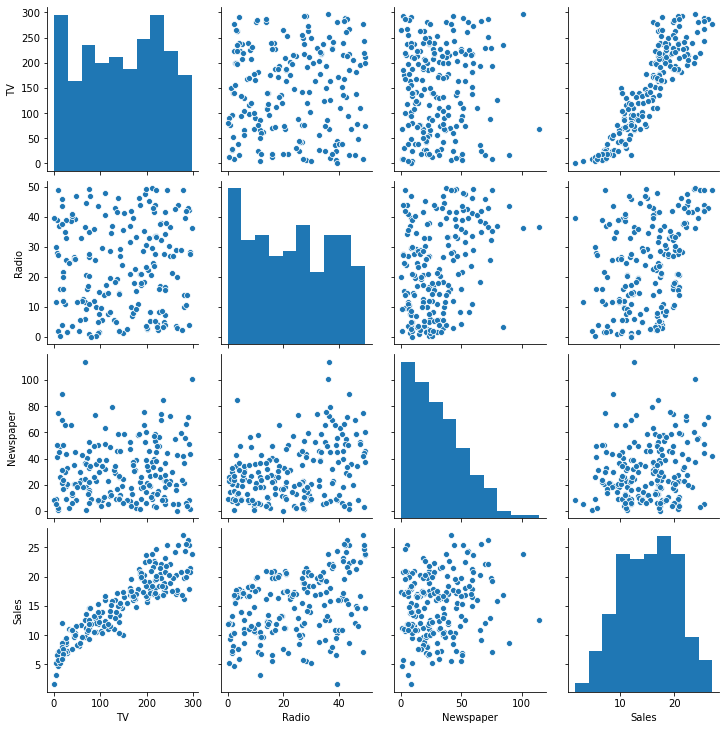

In [ ]:
import seaborn as sns
# Diagrama de dispersion por pares usando Pairplots seaborn
sns.pairplot(dataset) 

In [ ]:
# Información
# Se observa que la variables sales tiene una relacion lineal con la variable TV

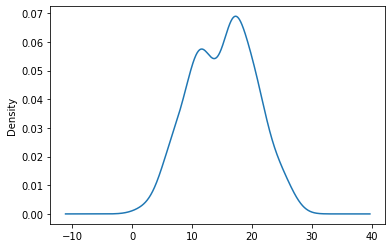

In [ ]:
# Histograma
# dataset['Sales'].plot.hist(bins=25,figsize=(8,4)) # 25 cortes
# Densidad (Histograma suavizado)
dataset['Sales'].plot.density()
# dataset['Sales'].plot.box(figsize=(8,4))

In [ ]:
dataset.corr()
# OBSERVACION
# Sales con TV tienen una alta correlación 0.90
# Sales con Radio tienen una correlación de 0.35
# Sales con Newspaper tienen una correlación 0.16

#NOTA: Cuando 2 variables tiene una correlacion > 0.6 ya es significativa (Mas cercano a 1 o -1)

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

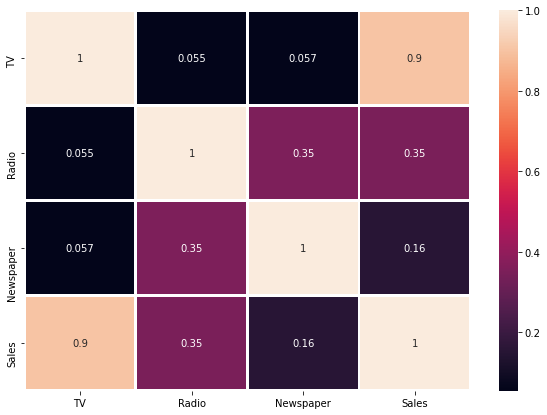

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(dataset.corr(),annot=True, linewidths=2)
# MATRIZ DE CORRELACIONES

## MODELADO

In [ ]:
dataset.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

Nuestra regresión multiple se veria de la sgte forma:

> $Y_{Sales} = a + b(X_{Tv}) + c( X_{newspaper}) + d( X_{Radio}$)

Más adelante se vera que una de las variables no nos proporciona tanto valor por ende no sera considerada

### REGRESION MULTIPLE

In [ ]:
# Definimos la variable respuesta y la variable predictora
target = 'Sales'
# predictoras = ['TV','Radio','Newspaper']
predictoras = ['TV','Radio']
# Solo se escoje las variables 'TV'y 'Radio' debido a que son
# las que explican mas la variabilidad de ventas

In [ ]:
# Obtenemos del dataframe el conjunto de datos
X = dataset[predictoras]
y = dataset[target]

In [ ]:
X

,TV,Radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


In [ ]:
# Generamos el conjunto de train y test gracias a sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
# Importamos el Modelo de Regresion Lineal
from sklearn.linear_model import LinearRegression
# Importamos las metricas de la regresion
from sklearn import metrics
# Creamos el modelo de la regresion
lm = LinearRegression() # Creando un objeto de Regresión Lineal 'lm'

In [ ]:
# Entrenamiento del modelo
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("La intersección del modelo lineal:", lm.intercept_)
print("Los coeficientes del modelo lineal:", lm.coef_)

La intersección del modelo lineal: 4.483453135931349
Los coeficientes del modelo lineal: [0.05533174 0.10459835]


Nuestra regresión multiple se veria de la sgte forma:

$Y_{Sales} = 4.48 + 0.06(X_{Tv}) + 0.10( X_{Radio}$)

**Interpretación:**

*   Si no invertimos en publicidad en radio podremos decir que: Por cada aumento en una unidad de **la inversion en publicidad en la Tv**, el **total de ventas del producto** aumentará en **0.06 mil de soles**.
*   Si no invertimos en publicidad en tv podremos decir que: Por cada aumento en una unidad de **la inversion en publicidad en la radio**, el **total de ventas del producto** aumentará en **0.10 mil de soles**.
*   Cuando las variables predictoras sean 0, el **total de ventas del producto** es de 4.48 mil de soles



In [ ]:
# Predecimos la data de entrenamiento y la data del test
train_pred=lm.predict(X_train)
test_pred=lm.predict(X_test)

In [ ]:
# Visualizar el entrenamiento y la predicion
display(pd.concat([X_train, y_train], axis = 1).head()) # DATA REAL
train_pred[:5] # LA PREDICIÓN

,TV,Radio,Sales
81,239.8,4.1,17.3
107,90.4,0.3,12.0
112,175.7,15.4,17.1
145,140.3,1.9,10.3
8,8.6,2.1,4.8


array([18.18085714,  9.51682175, 15.81605411, 12.44523284,  5.17896262])

In [ ]:
# R2 || Ajuste del modelo := Que porcentaje de la variación de y es esxplicado por x
print("Valor del R cuadrado del train:", round(metrics.r2_score(y_train,train_pred), 2))
print("Valor del R cuadrado del test:", round(metrics.r2_score(y_test,test_pred), 2))

# Se observa que nuestras variables predictoras explican en 91% 
# Solo es 91% de la variación de Y (sales) es explicado por nuestras variables predictoras (x)
# Como se observa que el R2 del train y del test estan muy cerca significa que no hay overfiting

Valor del R cuadrado del train: 0.91
Valor del R cuadrado del test: 0.88


**Interpretación:**

*   El **88%** de la variación del **total de ventas** es explicado por las variables **Inversion en tv** y **Inversion en radio** 

In [ ]:
# Calculando los errores
print("Calculando el Error Absoluto Medio (MAE)") # Que tan alejados estan mis valores reales de los predichos
print("MAE del Train:", metrics.mean_absolute_error(y_train,train_pred))
print("MAE del Test:", metrics.mean_absolute_error(y_test,test_pred))
print("\nCalculando el Error Cuadratico Medio (MSE)") # No se interpreta
print("MAE del Train:", metrics.mean_squared_error(y_train,train_pred))
print("MAE del Test:", metrics.mean_squared_error(y_test,test_pred))
print("\nCalculando la Raiz del Error Cuadratico Medio (RMSE)") # Raiz de MSE
print("MAE del Train:", np.sqrt( metrics.mean_squared_error(y_train,train_pred)))
print("MAE del Test:", np.sqrt(metrics.mean_squared_error(y_test,test_pred)))
# Que tan alejados estan mis valores reales de los predichos
# Mas penalizador
# Diferencia entre los valores reales y los valores predichos

Calculando el Error Absoluto Medio (MAE)
MAE del Train: 1.1933552055585421
MAE del Test: 1.3722057590910193

Calculando el Error Cuadratico Medio (MSE)
MAE del Train: 2.4886670192180094
MAE del Test: 3.2561838061058435

Calculando la Raiz del Error Absoluto Medio (RMSE)
MAE del Train: 1.5775509561399306
MAE del Test: 1.8044899019129599


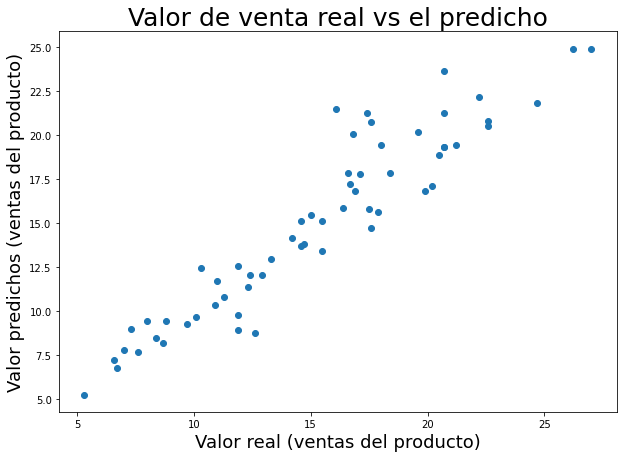

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Valor de venta real vs el predicho",fontsize=25)
plt.xlabel("Valor real (ventas del producto)",fontsize=18)
plt.ylabel("Valor predichos (ventas del producto)", fontsize=18)
plt.scatter(x=y_test,y=test_pred);

**FRASE MOTIVADORA**

> *Los grandes objetivos requieren una gran dedicación. No te rindas solo porque se hizo difícil, en vez de eso, fortalecete.* 💪🔥

